In [1]:
# Имя набор данных построить аппроксимационную модель
# Хьюбер, Тюки - функция потерь - это робастость
# Квадрат если небольшое
# Линия если больше
# Константа
# 2 - регуляризация L1, L2, SVD
# 3 - робастость

In [2]:
# 4 Лаб работа - сплайны. Натуральный сплайн
# 4 Лаб работа - сплайны. Робастный сглаживающий сплайн

In [3]:
!python -m pip install matplotlib numpy

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from sys import float_info

import numpy as np
from numpy.linalg import solve

def ordinary_least_squares(x: np.ndarray, y: np.ndarray, order: int,
        p: int = 0, alpha: float = 1.0, eps: float = 1E-8, max_iter: int = 100):
    if (not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray)
            or not isinstance(order, int) or not isinstance(p, int)
            or not isinstance(alpha, float) or not isinstance(eps, float)
            or not isinstance(max_iter, int)):
        raise TypeError()
    if (len(x.shape) != 1 or len(y.shape) != 1 or x.shape != y.shape
            or order < 2 or p not in range(3) or alpha < 0
            or eps < float_info.epsilon or max_iter < 1):
        raise ValueError()

    n = len(x)
    x_upper = np.vander(x, order + 1, increasing=False)
    left, right = x_upper.T @ x_upper, x_upper.T @ y
    print('Condition number =', np.linalg.cond(left))

    if p == 2:
        left += alpha * np.eye(order + 1)
        print('L2: Condition number =', np.linalg.cond(left))
    if p != 1:
        return solve(left, right)

    for _ in range(max_iter):
        next_a = solve(left, right)
    return 5, next_a

In [5]:
from math import cos, sin, sqrt

def f(x: float) -> float:
    # return x + 10 * sin(x / 10.0) + 15 * sin(x / 5) + 20 * sin(x / 2)
    return x**2 - 17 * sin(7.0 / 9.0 * x)

start, stop, extended = 0, 13, 3
x = np.linspace(start, stop, 2 ** 6)
extended_x = np.linspace(start - extended, stop + extended, 2 ** 20)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

<Figure size 6400x3600 with 1 Axes>

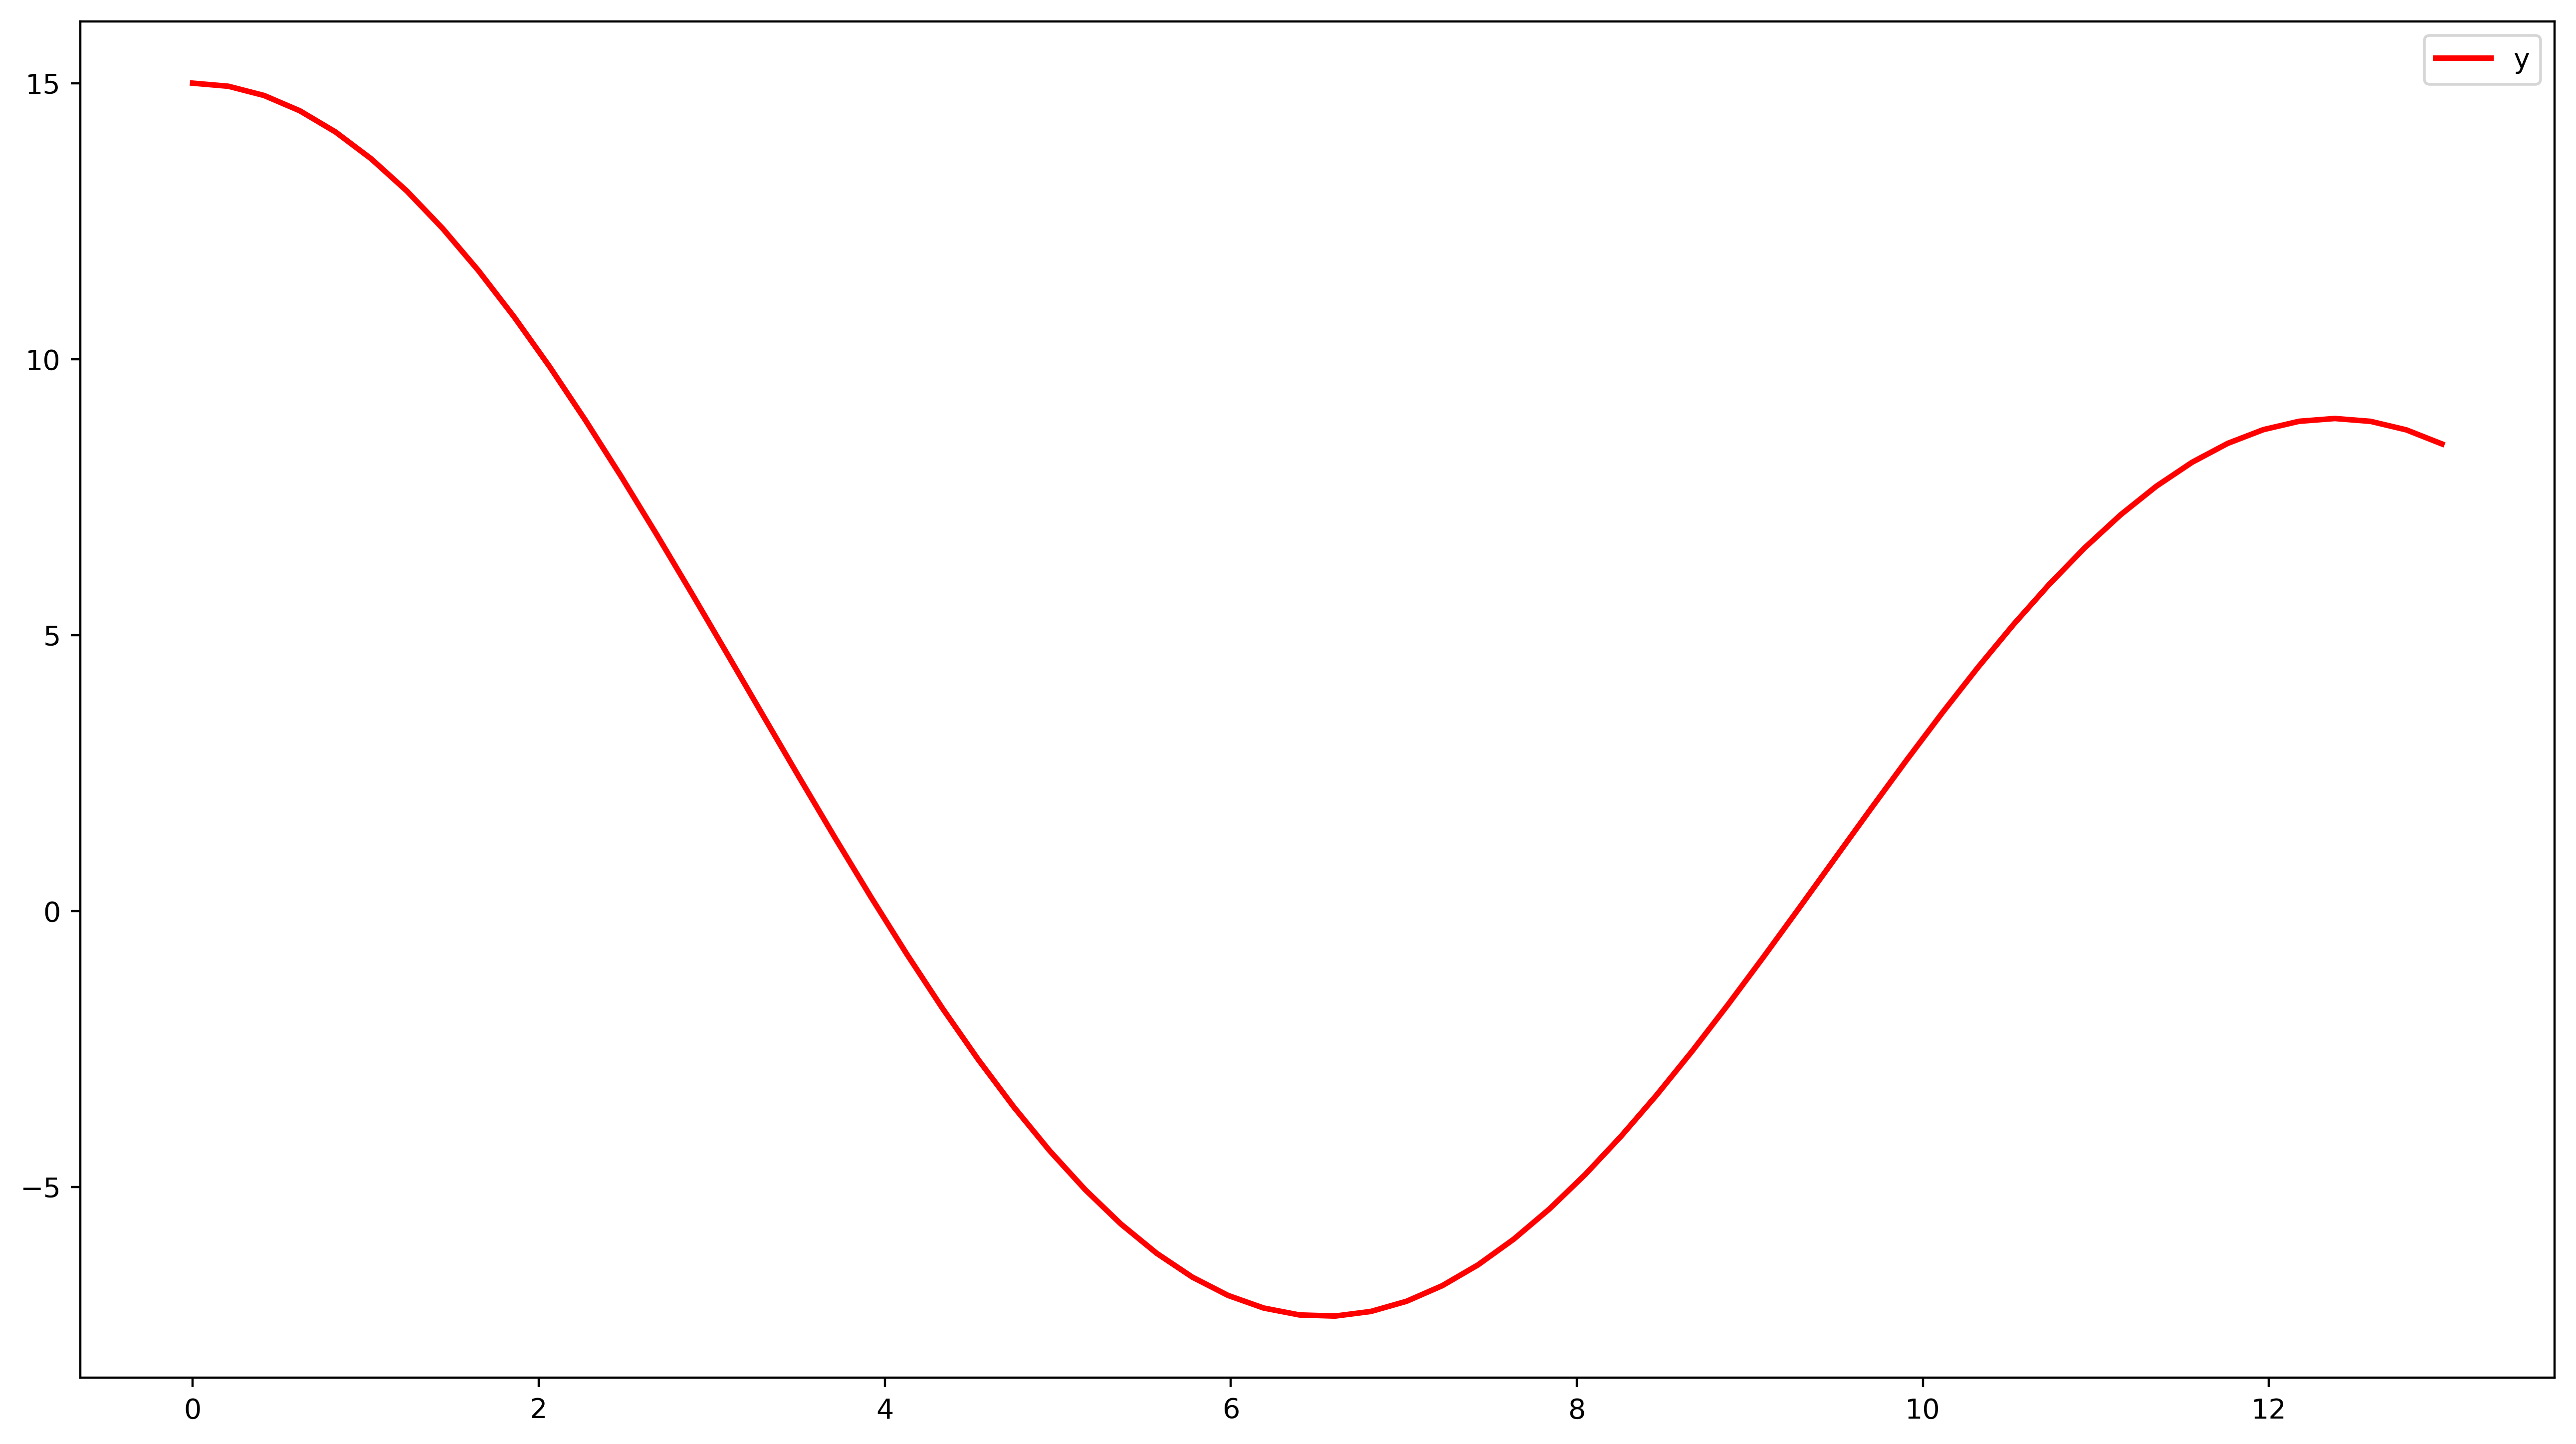

In [7]:
def f_prime(x: float) -> float:
    return 1 + cos(x / 10) + 3 * cos(x / 5) + 10 * cos(x / 2)

f_prime_vectorize = np.vectorize(f_prime)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

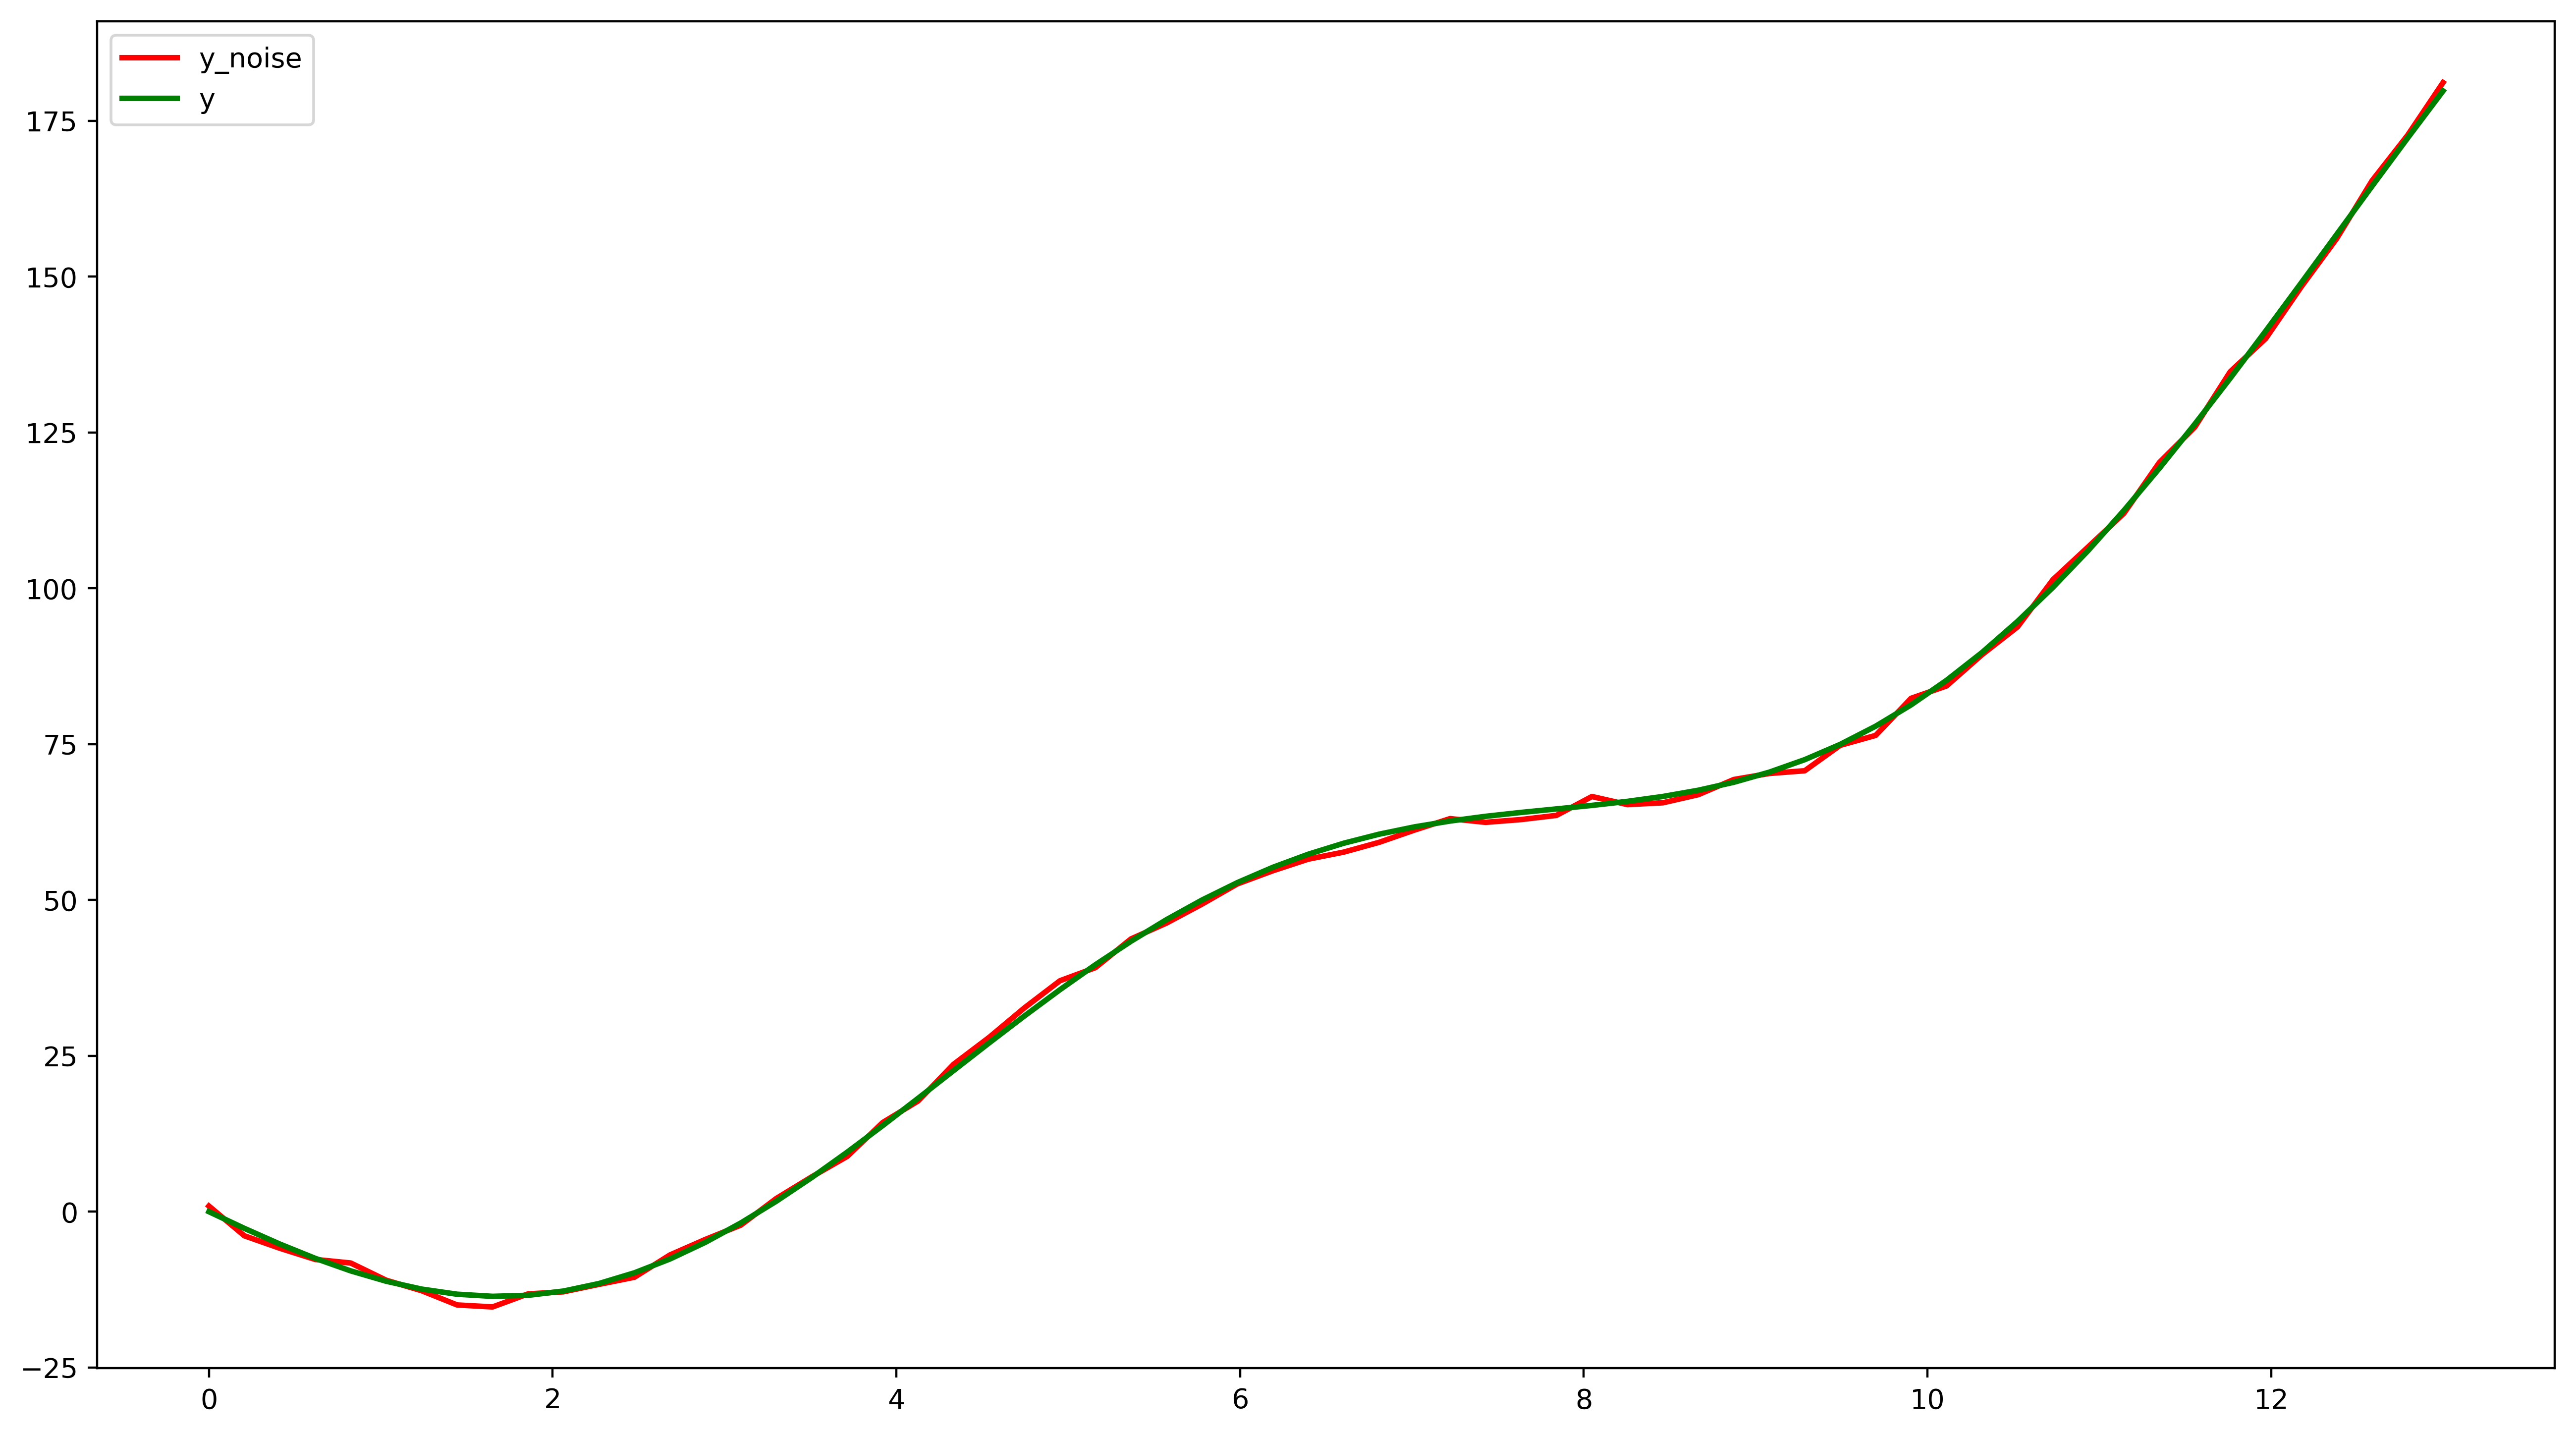

In [8]:
from numpy.random import normal

y_noise = y + normal(loc=0, scale=1.0, size=len(y))
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
plt.legend()
plt.show()

Condition number = 54752.72132287696


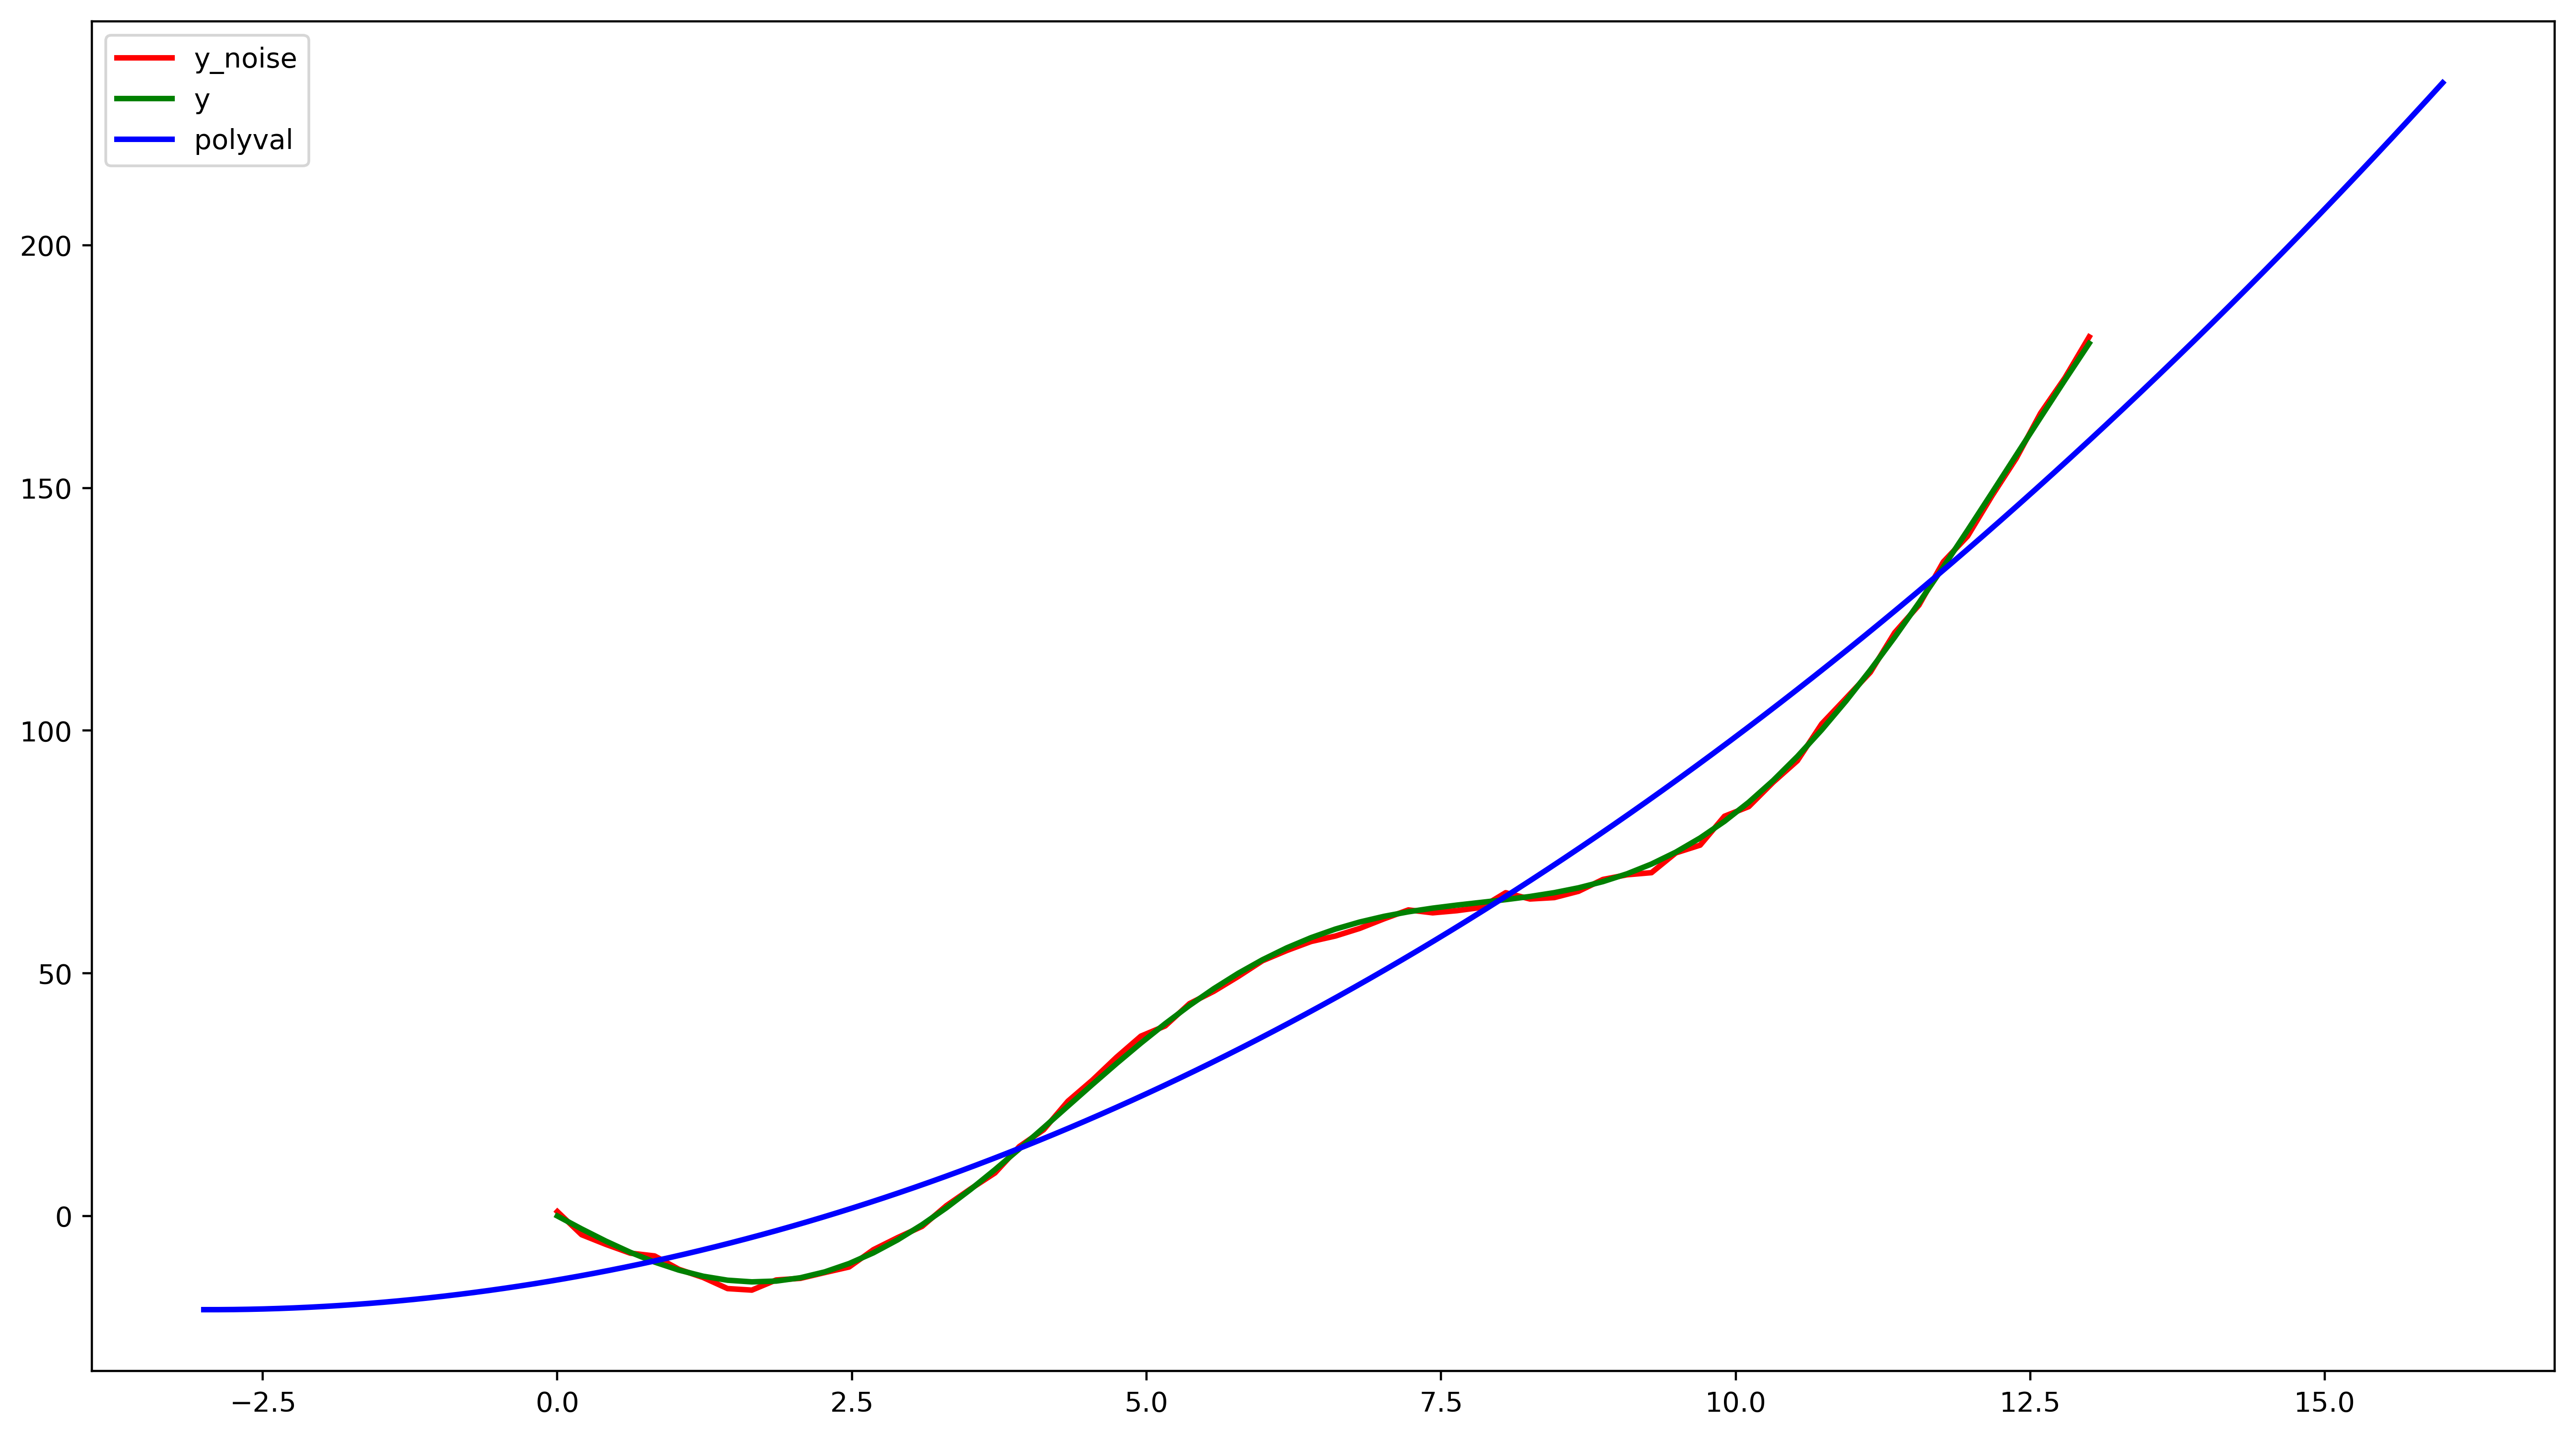

[  0.70384155   4.15367839 -13.18058662]


In [9]:
poly = ordinary_least_squares(x, y_noise, order=2, p=0, alpha=0.0)
polyval = np.polyval(poly, extended_x)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
subplot.plot(extended_x, polyval, color = 'blue', lw = 2, label = 'polyval')
plt.legend()
plt.show()
print(poly)

Condition number = 4221895909.8740206


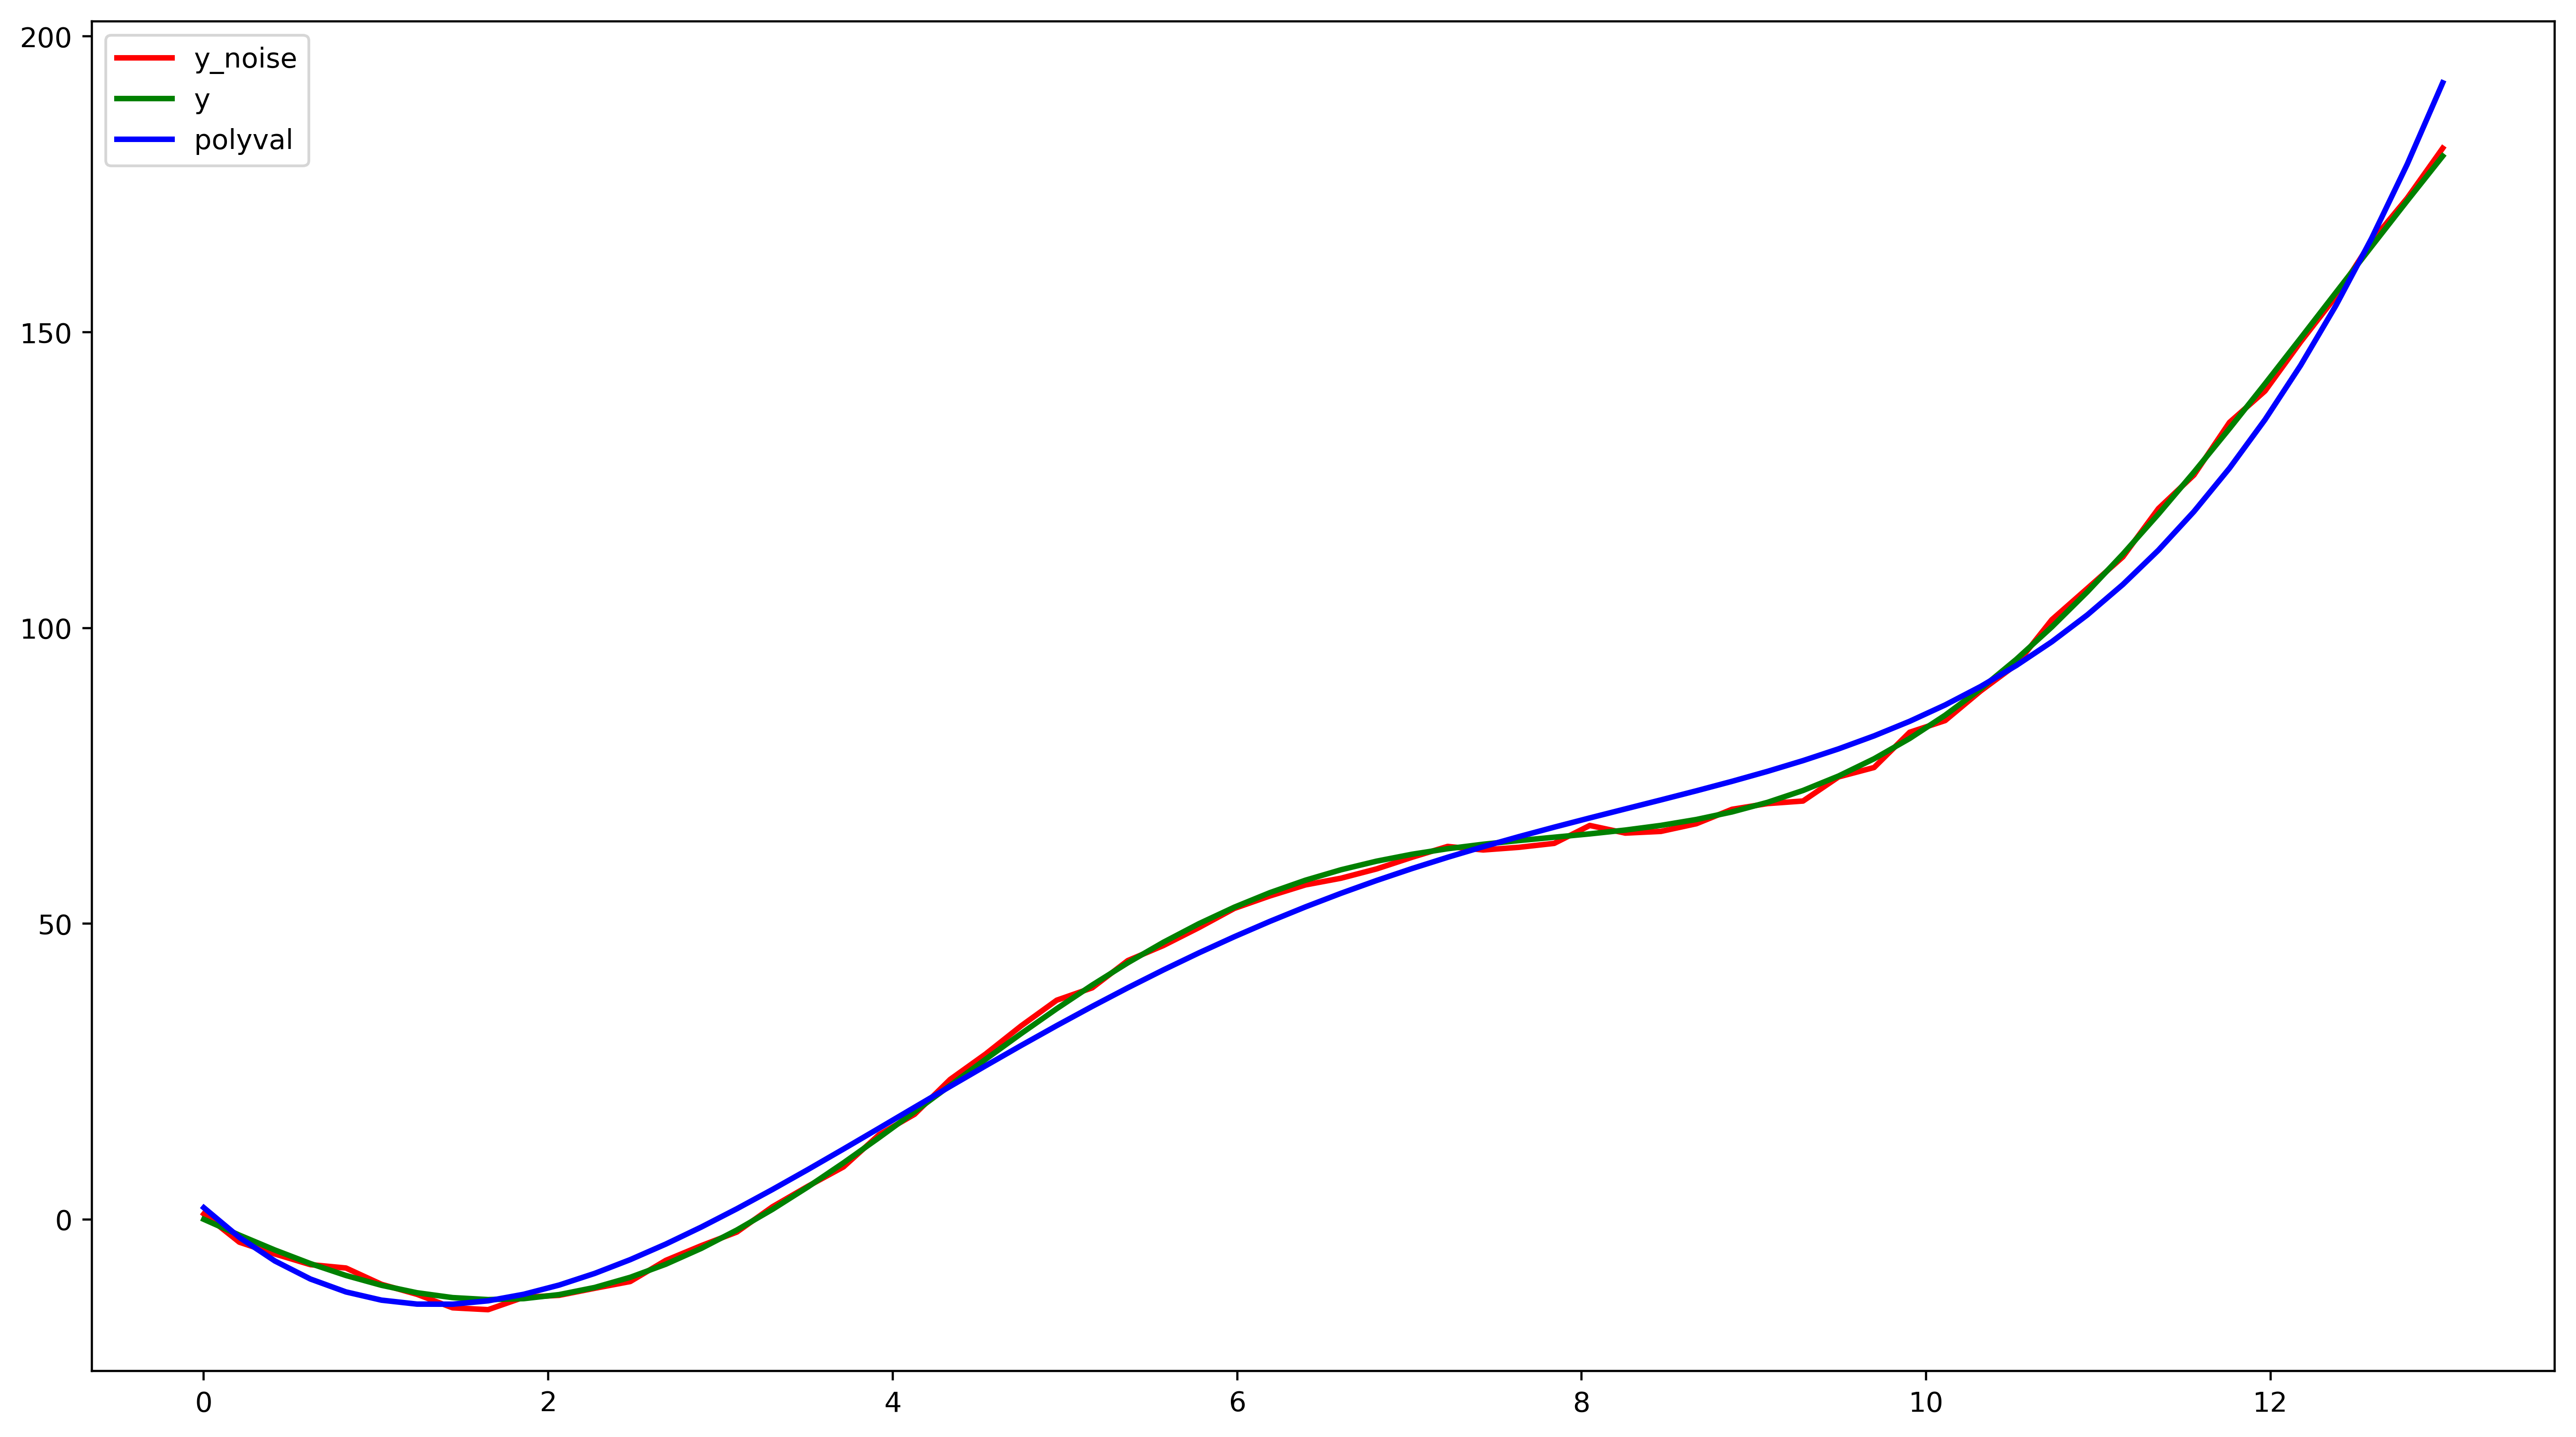

[  0.06421416  -1.58711232  12.97690128 -26.92477457   1.96541435]


In [10]:
poly = ordinary_least_squares(x, y_noise, order=4, p=0, alpha=0.0)
polyval = np.polyval(poly, x)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
subplot.plot(x, polyval, color = 'blue', lw = 2, label = 'polyval')
plt.legend()
plt.show()
print(poly)

Condition number = 4221895909.8740206


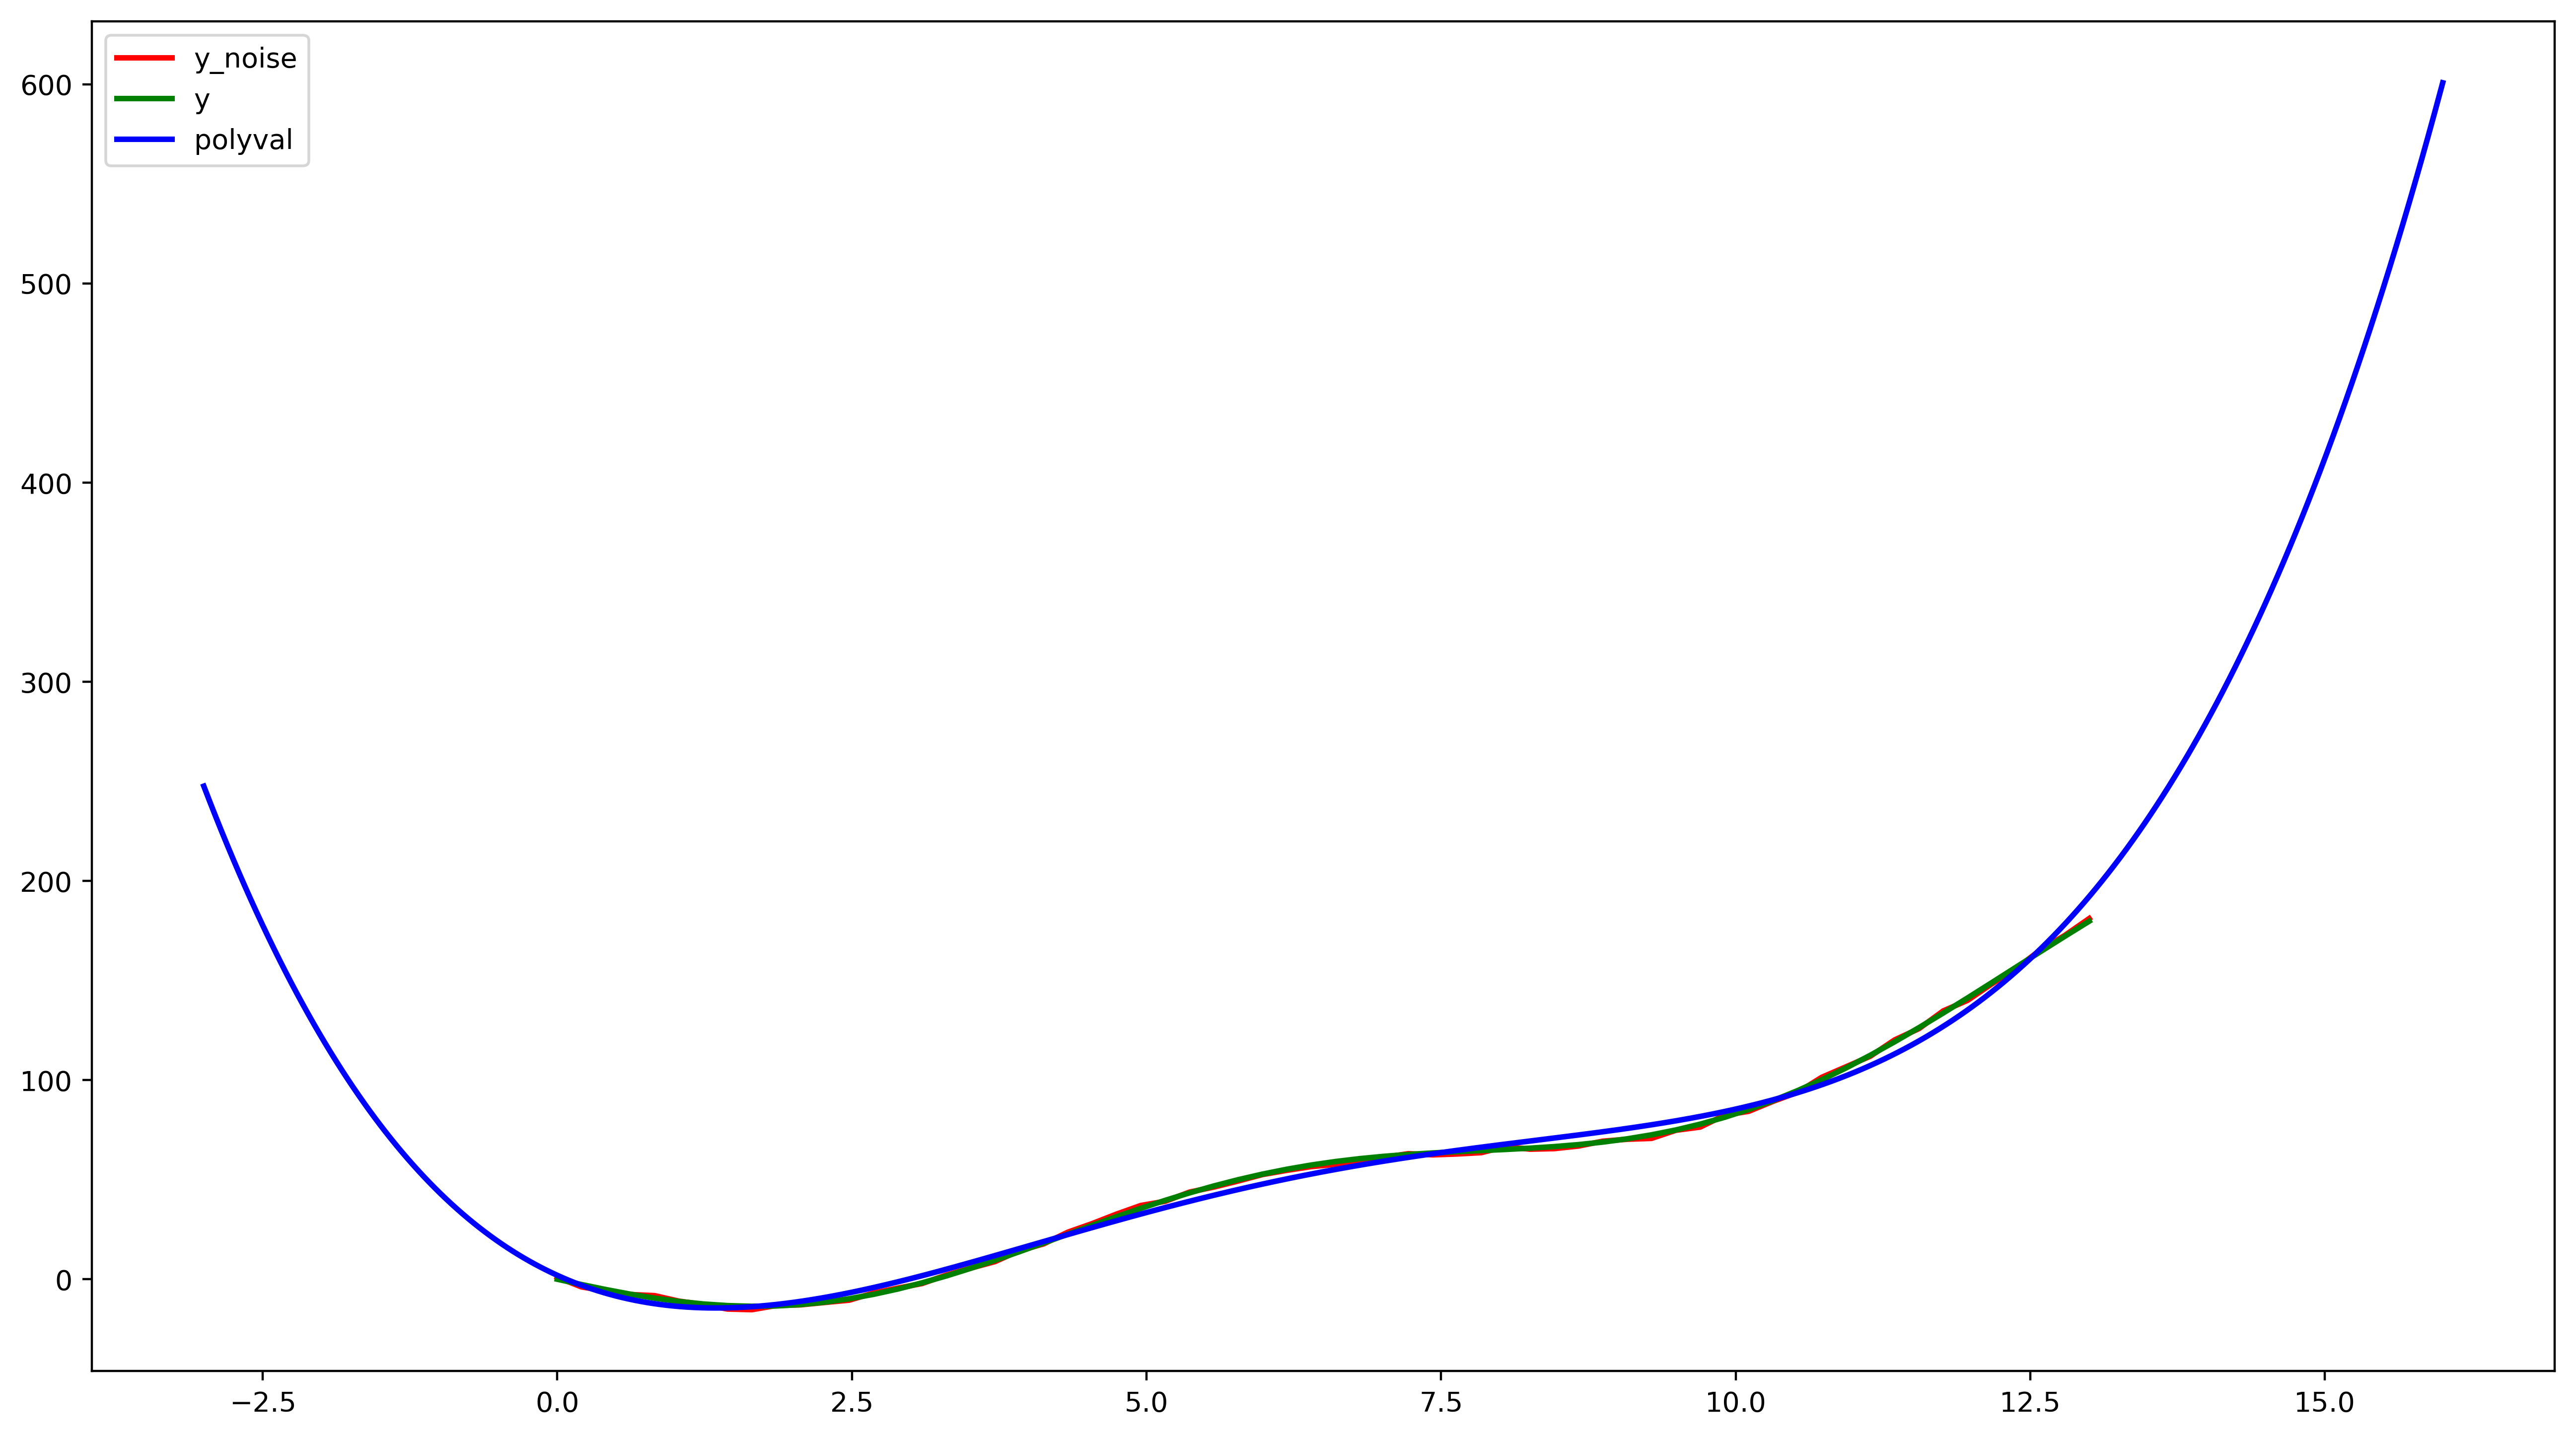

[  0.06421416  -1.58711232  12.97690128 -26.92477457   1.96541435]


In [11]:
poly = ordinary_least_squares(x, y_noise, order=4, p=0, alpha=0.0)
polyval = np.polyval(poly, extended_x)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
subplot.plot(extended_x, polyval, color = 'blue', lw = 2, label = 'polyval')
plt.legend()
plt.show()
print(poly)

Condition number = 4221895909.8740206
L2: Condition number = 4207505721.1462736
[  0.06413905  -1.58502884  12.95792551 -26.86286708   1.91707582]
Condition number = 4221895909.8740206
L2: Condition number = 4082276999.430456
[  0.06348267  -1.5668291   12.79228578 -26.32324716   1.49756231]
Condition number = 4221895909.8740206
L2: Condition number = 3145944182.2122183
[  0.05837089  -1.42567486  11.51637883 -22.22354274  -1.55431321]
Condition number = 4221895909.8740206
L2: Condition number = 955153406.6233628
[  0.04166314  -0.97739538   7.66185528 -11.12540541  -6.72862239]
Condition number = 4221895909.8740206
L2: Condition number = 119936021.4622541
[ 0.02004579 -0.43072249  3.4612046  -2.29259451 -2.66734448]
Condition number = 4221895909.8740206
L2: Condition number = 12308292.654017981
[ 0.00651059 -0.12228572  1.49482358  0.15008884 -0.21728102]


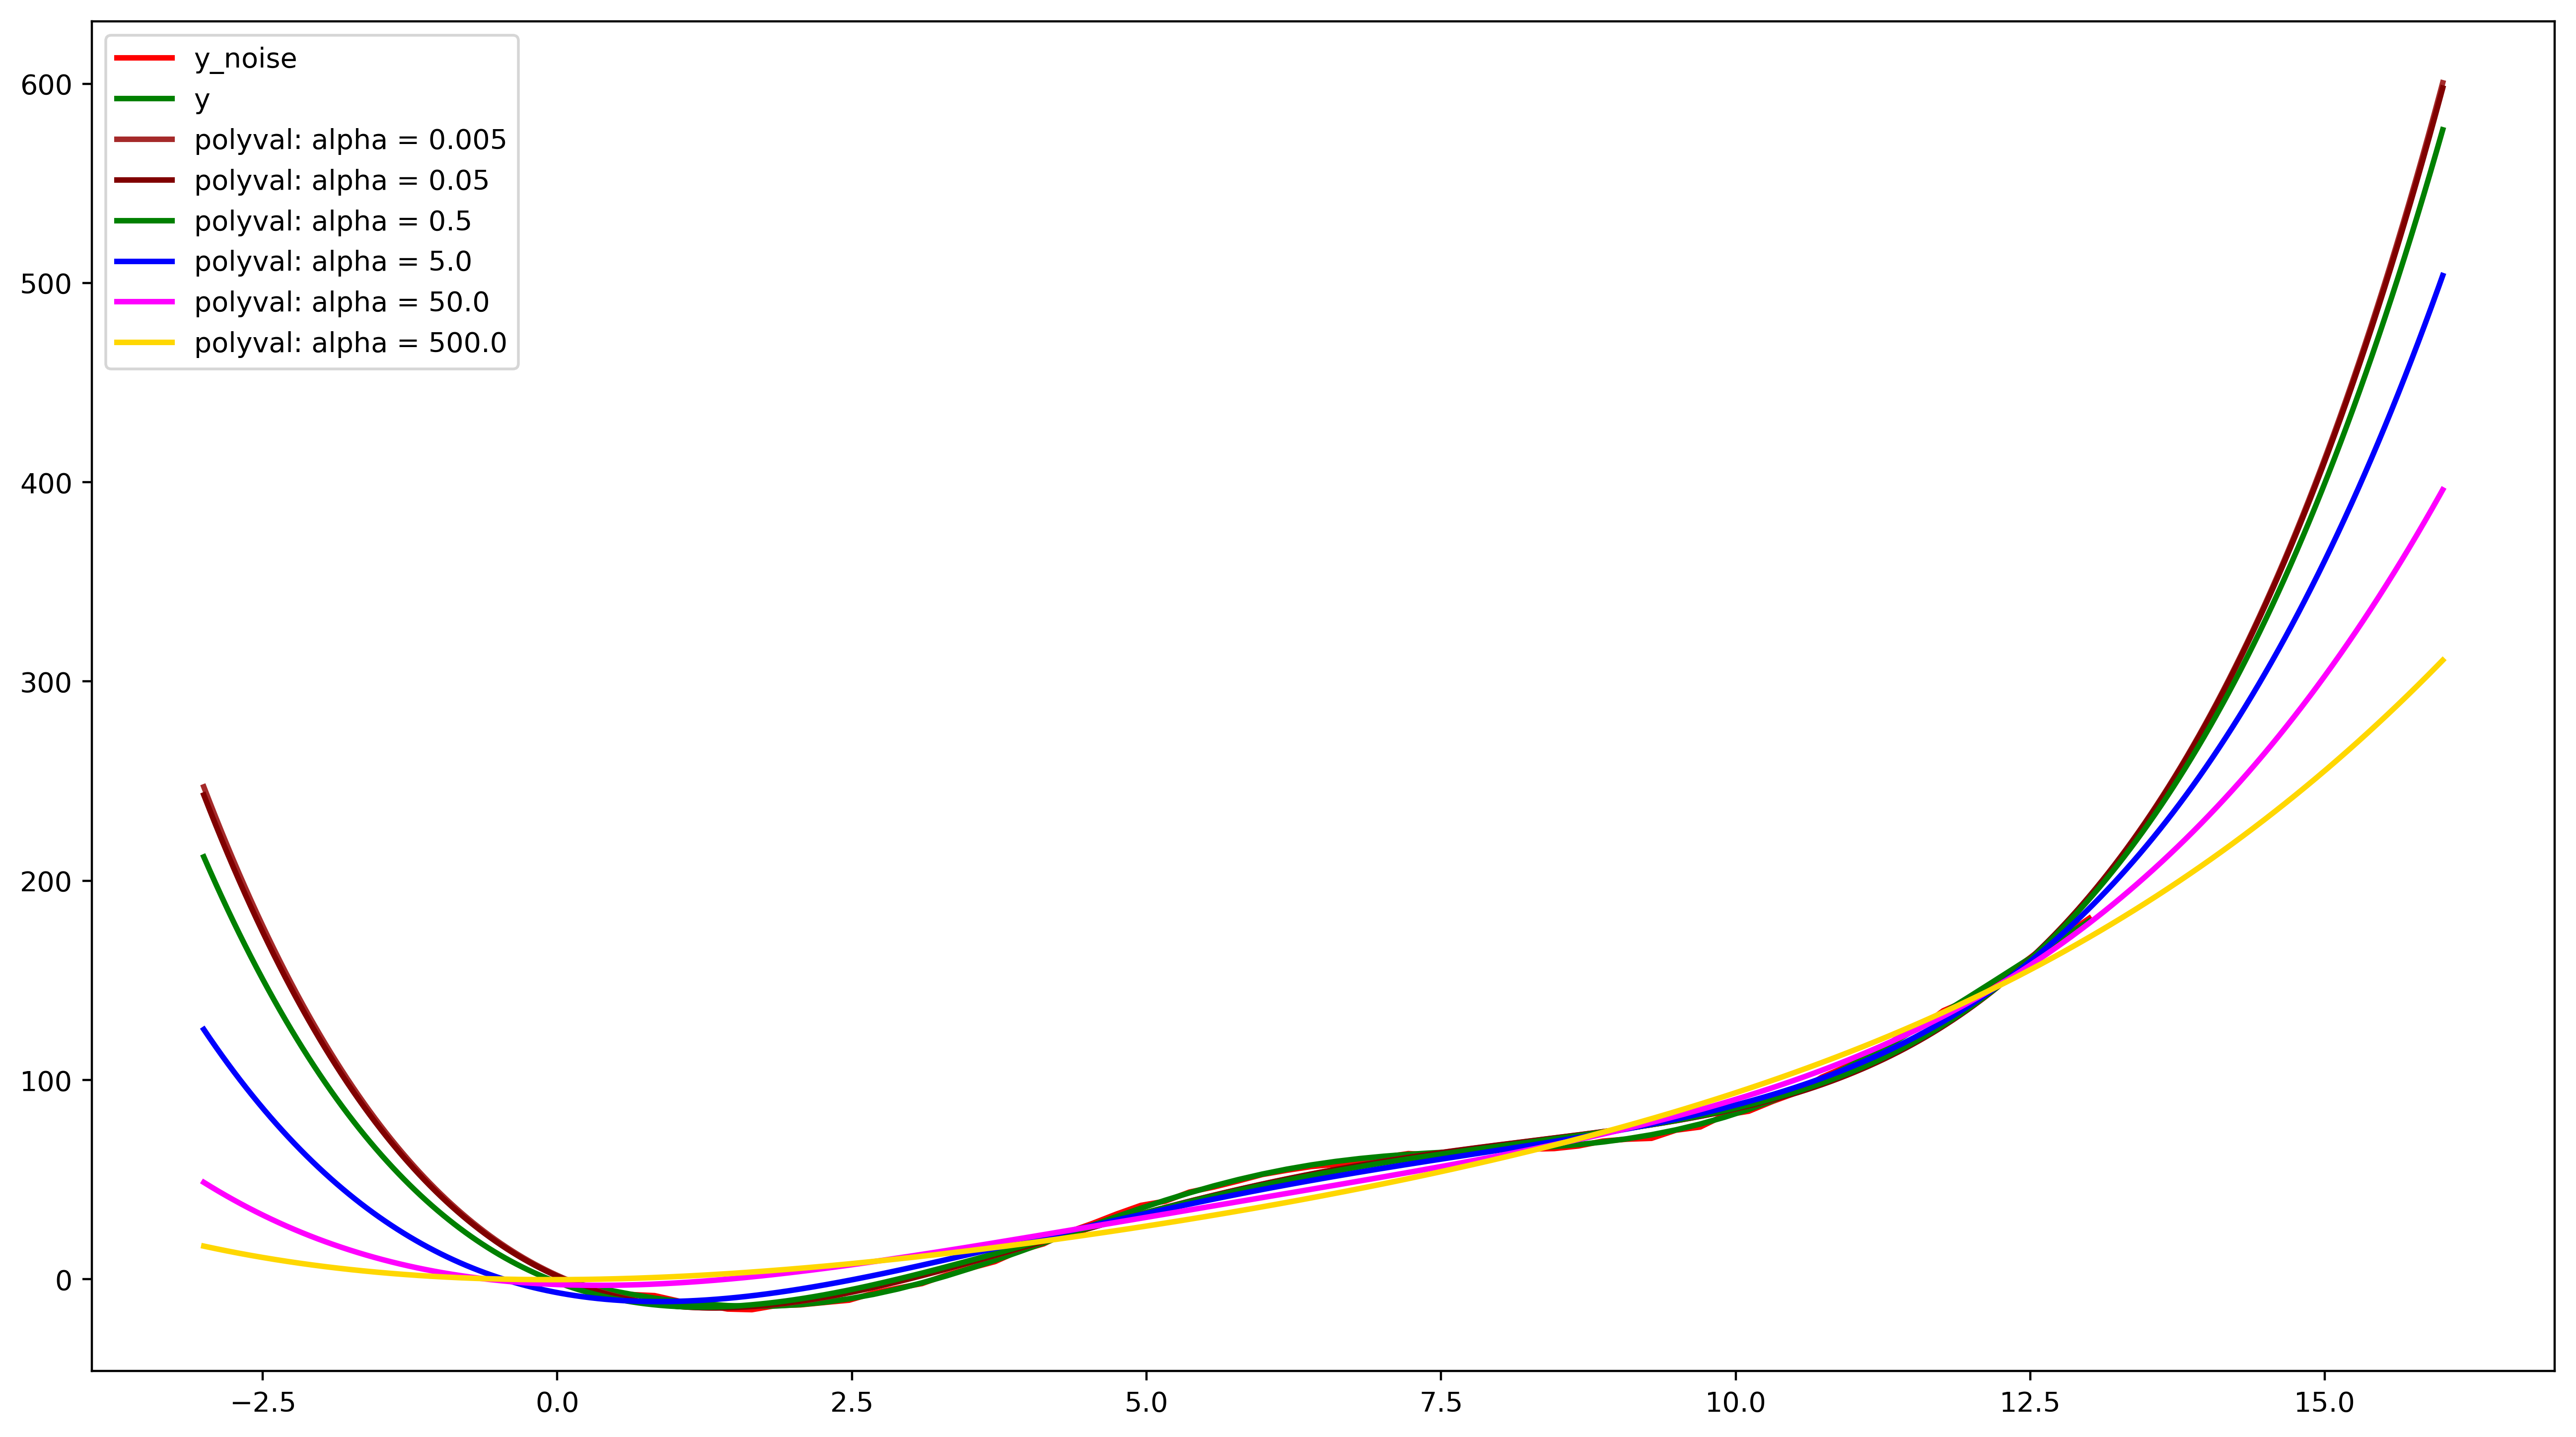

In [15]:
colors = ['brown', 'maroon', 'green', 'blue', 'magenta', 'gold']
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')

for i in range(6):
    alpha = 0.005 * (10 ** i)
    poly = ordinary_least_squares(x, y_noise, order=4, p=2, alpha=alpha)
    polyval = np.polyval(poly, extended_x)

    subplot.plot(extended_x, polyval, color = colors[i], lw = 2, label = 'polyval: alpha = ' + str(alpha))
    print(poly)
plt.legend()
plt.show()